In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,NearMiss

https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/
https://stackoverflow.com/questions/55921286/should-i-balance-the-test-set-when-i-have-highly-unbalanced-data


In [5]:
df = pd.read_csv("../../data/final/trans_fraud_extra_2022-10-31_12:38:18.csv")
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape (-1,1))
df = df.drop(['Time', 'Amount'], axis = 1)

df.head()


,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Class,inversed_dist,fraud_neighbor_count,community_risk,personalized_page_rank,normAmount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.128539,-0.189115,0.133558,-0.021053,0,0.0,0,0.002786,0.000177,0.244964
1,1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.167170,0.125895,-0.008983,0.014724,0,0.0,0,0.000000,0.000359,-0.342475
2,2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.327642,-0.139097,-0.055353,-0.059752,0,0.0,0,0.000000,0.000047,1.160686
3,3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.647376,-0.221929,0.062723,0.061458,0,0.0,0,0.001603,0.000064,0.140534
4,4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.206010,0.502292,0.219422,0.215153,0,0.0,0,0.002786,0.000136,-0.073403


In [6]:
df.columns

Index(['Unnamed: 0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'inversed_dist', 'fraud_neighbor_count', 'community_risk',
       'personalized_page_rank', 'normAmount'],
      dtype='object')

Distribution of Target class

In [7]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Preparing data for Training

In [8]:
X = df[df.columns.difference(["Class","Time"])]
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=1234)

Feature Scaling

In [9]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [10]:
def fit_and_predict(model, X_train, y_train, X_test, y_test,desc=""):
    model = model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test,prediction)
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size=10)

    plt.xlabel('Predictions', fontsize=10)
    plt.ylabel('Actuals', fontsize=10)
    plt.title('Confusion Matrix', fontsize=10)
    plt.show()

    print(f'Accuracy: {accuracy_score(y_test, prediction):.3f}'  )
    print(f'Precision: {precision_score(y_test, prediction):.3f}'  )
    print(f'Recall: {recall_score(y_test,prediction):.3f}')
    print(f'F1: {f1_score(y_test,prediction):.3f}')

Training the Algorithm

In [11]:
NUM_ESTIMATOR = 150

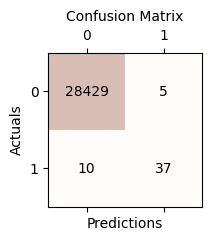

Accuracy: 0.999
Precision: 0.881
Recall: 0.787
F1: 0.831
CPU times: user 3min 31s, sys: 332 ms, total: 3min 32s
Wall time: 3min 32s


In [12]:
%%time
rf_clf = RandomForestClassifier(n_estimators=NUM_ESTIMATOR)
fit_and_predict(rf_clf, X_train, y_train, X_test, y_test,desc="")

# Handling imbalance Data

In [13]:
print(f"The number of records in the training dataset is {X_train.shape}")
print(f"The number of records in the test dataset is {X_test.shape}")
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The number of records in the training dataset is (256326, 34)
The number of records in the test dataset is (28481, 34)
The training dataset has 255881 records for the majority class and 445 records for the minority class.


 ### Random Oversampling for Imbalanced Dataset

In [14]:
ros = RandomOverSampler(random_state=1234)
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_ros).items()))
print("After random oversampling, the minority category increased")

[(0, 255881), (1, 255881)]
After random oversampling, the minority category increased


Training

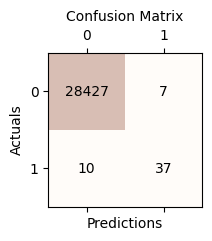

Accuracy: 0.999
Precision: 0.841
Recall: 0.787
F1: 0.813
CPU times: user 2min 49s, sys: 2.75 s, total: 2min 52s
Wall time: 2min 52s


In [15]:
%%time
rf_clf = RandomForestClassifier(n_estimators=NUM_ESTIMATOR)
fit_and_predict(rf_clf, X_train_ros, y_train_ros, X_test, y_test,desc="")


### SMOTE Oversampling for Imbalanced Dataset

In [16]:
# Randomly over sample the minority class
smote = SMOTE(random_state=1234)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

# Check the number of records after over sampling
print(sorted(Counter(y_train_smote).items()))
print("Similar to random oversampling, the minority category increased")

[(0, 255881), (1, 255881)]
Similar to random oversampling, the minority category increased


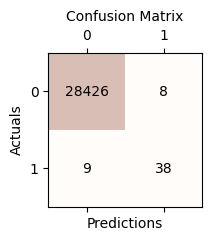

Accuracy: 0.999
Precision: 0.826
Recall: 0.809
F1: 0.817
CPU times: user 6min 5s, sys: 829 ms, total: 6min 6s
Wall time: 6min 6s


In [17]:
%%time
rf_clf = RandomForestClassifier(n_estimators=NUM_ESTIMATOR)
fit_and_predict(rf_clf, X_train_smote, y_train_smote, X_test, y_test,desc="")

### Random Under-Sampling for Imbalanced Dataset

In [18]:
# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=12345)
X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)

# Check the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))
print("After random under-sampling, the majority category decreased")

[(0, 445), (1, 445)]
After random under-sampling, the majority category decreased


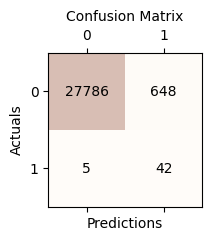

Accuracy: 0.977
Precision: 0.061
Recall: 0.894
F1: 0.114
CPU times: user 649 ms, sys: 112 ms, total: 761 ms
Wall time: 628 ms


In [19]:
%%time
rf_clf = RandomForestClassifier(n_estimators=NUM_ESTIMATOR)
fit_and_predict(rf_clf, X_train_rus, y_train_rus, X_test, y_test,desc="")

### Under-sampling Using NearMiss for Imbalanced Dataset

In [20]:
# Under sample the majority class
nearmiss = NearMiss(version=3)
X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(X_train,y_train)

# Check the number of records after over sampling
print(sorted(Counter(y_train_nearmiss).items()))
print("After NearMiss Under-sampling, the majority category decreased")

[(0, 445), (1, 445)]
After NearMiss Under-sampling, the majority category decreased


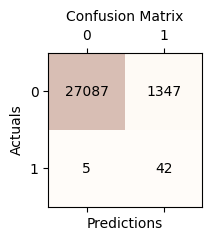

Accuracy: 0.953
Precision: 0.030
Recall: 0.894
F1: 0.058
CPU times: user 649 ms, sys: 148 ms, total: 797 ms
Wall time: 611 ms


In [21]:
%%time
rf_clf = RandomForestClassifier(n_estimators=NUM_ESTIMATOR)
fit_and_predict(rf_clf, X_train_nearmiss, y_train_nearmiss, X_test, y_test,desc="")